# Metric and Non - Metric MDS

In [1]:
# Chargement des librairies
import pandas as pd
import numpy as np
from plydata import *
import matplotlib.pyplot as plt
from scientisttools.extractfactor import get_mds
from scipy.spatial.distance import pdist,squareform
from scientisttools.pyplot import plot_shepard

import os
os.chdir("d:/Bureau/PythonProject/packages/scientisttools/data/")

In [2]:
#chargement - index_col = 0 pour indiquer que la colonne n°0 est un label import pandas 
D = pd.read_excel("Data_Methodes_Factorielles.xlsx",sheet_name="MDS_MADAGASCAR",index_col=0)
display(D)

,Antsiranana,Majunga,Tulear,Fianarantsoa,Tananarive,Toamasina
Ville,,,,,,
Antsiranana,0,859,2038,1522,1109,1287
Majunga,859,0,1495,979,566,926
Tulear,2038,1495,0,516,930,1266
Fianarantsoa,1522,979,516,0,414,750
Tananarive,1109,566,930,414,0,355
Toamasina,1287,926,1266,750,355,0


In [3]:
from scientisttools.manifold import MDS
my_mds = MDS(n_components=2,
             random_state=123,
             proximity ="precomputed",
             labels=D.index.values,
             normalized_stress=True,
             parallelize=False)
my_mds.fit(D)

MDS(labels=array(['Antsiranana', 'Majunga', 'Tulear', 'Fianarantsoa', 'Tananarive',
       'Toamasina'], dtype=object),
    proximity='precomputed', random_state=123)

In [4]:
from scientisttools.extractfactor import get_mds
coord = get_mds(my_mds)["coord"]
display(coord)

,Dim.1,Dim.2
Antsiranana,48.626118,1097.674748
Majunga,376.251789,391.007366
Tulear,128.924451,-1000.502329
Fianarantsoa,25.630740,-473.424473
Tananarive,-80.086509,-38.472451
Toamasina,-499.346589,23.717139


In [5]:
print(my_mds.stress_)

0.051363799503311755


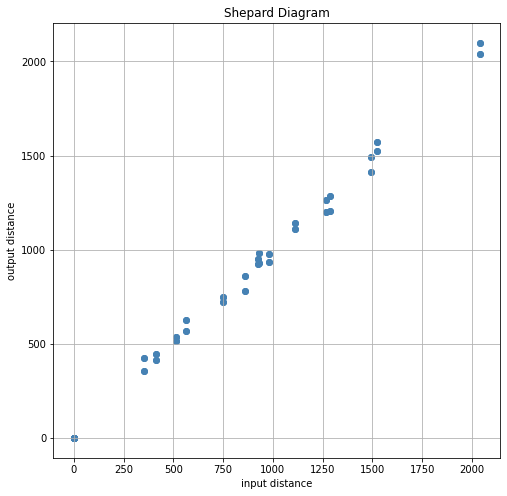

In [6]:
fig, axe =plt.subplots(figsize=(8,8))
plot_shepard(my_mds,ax=axe)